In [1]:
import os
os.chdir('..')

In [8]:
import src.utils as fr_sys

In [3]:
# DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
DEVICE = 'cpu'
print('Using device:', DEVICE)

Using device: cpu


In [4]:
# UNCOMMENT THIS TO DOWNLOAD WEIGHTS

# os.chdir('./model')
# import gdown
# !gdown 170F9YSmJ2aSp64VetwyyNF5q78KkDryv
# os.chdir('..')

Downloading...
From (original): https://drive.google.com/uc?id=170F9YSmJ2aSp64VetwyyNF5q78KkDryv
From (redirected): https://drive.google.com/uc?id=170F9YSmJ2aSp64VetwyyNF5q78KkDryv&confirm=t&uuid=7faef682-f4b8-4af4-9dac-113f68fb1a15
To: c:\Users\user\FaceRecognition\model\arcface_trained_efnet2_pretrained.pt

  0%|          | 0.00/34.1M [00:00<?, ?B/s]
  2%|▏         | 524k/34.1M [00:00<00:23, 1.42MB/s]
  5%|▍         | 1.57M/34.1M [00:00<00:11, 2.73MB/s]
  8%|▊         | 2.62M/34.1M [00:00<00:07, 4.15MB/s]
 11%|█         | 3.67M/34.1M [00:00<00:06, 5.02MB/s]
 15%|█▌        | 5.24M/34.1M [00:01<00:05, 4.94MB/s]
 22%|██▏       | 7.34M/34.1M [00:01<00:03, 7.53MB/s]
 25%|██▍       | 8.39M/34.1M [00:01<00:03, 6.61MB/s]
 28%|██▊       | 9.44M/34.1M [00:01<00:03, 6.89MB/s]
 31%|███       | 10.5M/34.1M [00:01<00:03, 7.39MB/s]
 34%|███▍      | 11.5M/34.1M [00:01<00:03, 6.93MB/s]
 37%|███▋      | 12.6M/34.1M [00:02<00:03, 6.96MB/s]
 40%|███▉      | 13.6M/34.1M [00:02<00:02, 7.18MB/s]
 43%|████▎

## Load model

In [5]:
model = fr_sys.EfficientNet_B2()
model.load(
    path="model/arcface_trained_efnet2_pretrained.pt",
    weights_only=False,
    map_location=DEVICE
)

model.eval()
print("Model ready!")

Model defined succesfully!
Model ready!


### Looking at images <3

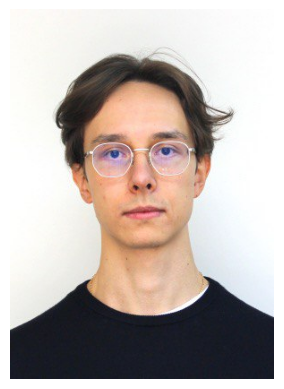

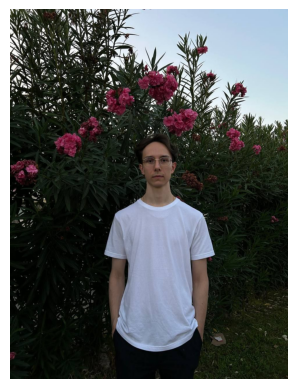

In [6]:
img1_name = './docs/Kamil1.jpg'
img2_name = './docs/Kamil2.jpg'
fr_sys.render_tensor(img1_name, device=DEVICE)
fr_sys.render_tensor(img2_name, device=DEVICE)

### Detecting faces on both

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

img1 = fr_sys.read_image(img1_name)
img2 = fr_sys.read_image(img2_name)

np_img1 = torch.permute(img1, (1, 2, 0)).numpy()
np_img2 = torch.permute(img2, (1, 2, 0)).numpy()

boxes, probs, landmarks = fr_sys.detect_faces(np_img1)
boxes_, probs_, landmarks_ = fr_sys.detect_faces(np_img2)

print(f"Find {len(boxes)} face(s) on the first image")
print(f"Find {len(boxes_)} face(s) on the second image")


Find 1 face(s) on the first image
Find 1 face(s) on the second image


<Figure size 640x480 with 0 Axes>

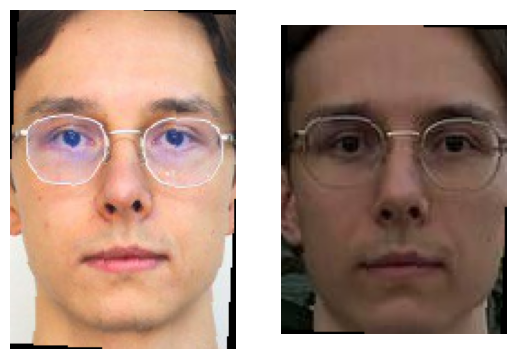

In [ ]:
face1 = fr_sys.extract_face(np_img1, boxes[0], landmarks[0])
face2 = fr_sys.extract_face(np_img2, boxes_[0], landmarks_[0])

aligned_face1 = fr_sys.align_face(face1)
aligned_face2 = fr_sys.align_face(face2)

plt.figure()
fig, ax = plt.subplots(1,2) 
ax[0].imshow(aligned_face1['image']); ax[0].axis('off')
ax[1].imshow(aligned_face2['image']); ax[1].axis('off')
plt.show()

In [35]:
from torchvision.transforms import v2
from torchvision import transforms

def custom_norm(x):
    return x/255

normalize_transformer = v2.Compose([
        custom_norm,
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        transforms.Resize((224, 224)),
    ])

# ----------------------------------------------------------------------------------

_, emb1, _ = model(normalize_transformer(
    torch.permute(aligned_face1['image'], (2,0,1)).unsqueeze(0)
))

_, emb2, _ = model(normalize_transformer(
    torch.permute(aligned_face2['image'], (2,0,1)).unsqueeze(0)
))

In [36]:
display(emb1)
display(emb2)

tensor([-0.1160,  0.1766, -0.0842,  ..., -0.1519,  0.1595, -0.0672],
       grad_fn=<SqueezeBackward0>)

tensor([-0.0896,  0.0315, -0.0775,  ..., -0.0937, -0.0486, -0.1640],
       grad_fn=<SqueezeBackward0>)

In [39]:
cos_sim = nn.CosineSimilarity(dim=0, eps=1e-12)

print(f"Face similarity is {cos_sim(emb1, emb2)}")

Face similarity is 0.4593520760536194


### One more image

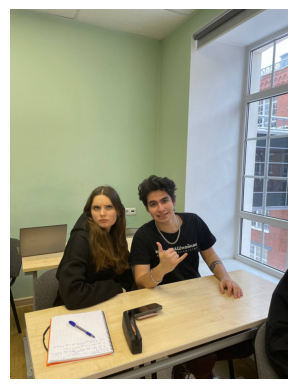

In [40]:
students = './docs/students.png'
fr_sys.render_tensor(students, device=DEVICE)

In [42]:
# Detecting faces again

students_img = fr_sys.read_image(students)

np_students = torch.permute(students_img, (1, 2, 0)).numpy()

boxes, probs, landmarks = fr_sys.detect_faces(np_students)

print(f"Find {len(boxes)} face(s) on the image")

Find 2 face(s) on the image


<Figure size 640x480 with 0 Axes>

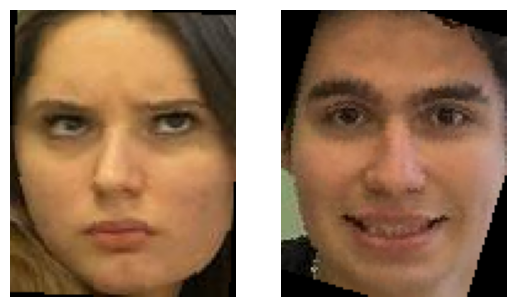

In [44]:
face1 = fr_sys.extract_face(students_img, boxes[0], landmarks[0])
face2 = fr_sys.extract_face(students_img, boxes[1], landmarks[1])

aligned_student_face1 = fr_sys.align_face(face1)
aligned_student_face2 = fr_sys.align_face(face2)

plt.figure()
fig, ax = plt.subplots(1,2) 
ax[0].imshow(aligned_student_face1['image']); ax[0].axis('off')
ax[1].imshow(aligned_student_face2['image']); ax[1].axis('off')
plt.show()

In [45]:
_, student_emb1, _ = model(normalize_transformer(
    torch.permute(aligned_student_face1['image'], (2,0,1)).unsqueeze(0)
))

_, student_emb2, _ = model(normalize_transformer(
    torch.permute(aligned_student_face2['image'], (2,0,1)).unsqueeze(0)
))

In [48]:
print(f"Face similarity between students {cos_sim(student_emb1, student_emb2)}")
print(f"Face similarity between student1 and Kamil1 {cos_sim(student_emb1, emb1)}")
print(f"Face similarity between student2 and Kamil1 {cos_sim(student_emb2, emb1)}")
print(f"Face similarity between student1 and Kamil2 {cos_sim(student_emb1, emb2)}")
print(f"Face similarity between student2 and Kamil2 {cos_sim(student_emb2, emb2)}")

# Если честно, то работает отстойно, но какие-то намеки на распознавание есть... Да же?

Face similarity between students 0.029852397739887238
Face similarity between student1 and Kamil1 0.26343730092048645
Face similarity between student2 and Kamil1 0.48612040281295776
Face similarity between student1 and Kamil2 0.28685951232910156
Face similarity between student2 and Kamil2 0.42823854088783264
